# Modules à importer

In [43]:
import re
import glob
import math
import scipy
import pickle
import sncosmo
import numpy as np
import pandas as pd
import seaborn as sn
import iminuit as im
import ipywidgets as ipw
from astropy.io import fits
from scipy.stats import poisson
from snprop import survey, tools
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from matplotlib.patches import Ellipse
from IPython.display import display, Latex
from sklearn.linear_model import LinearRegression
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "EB Garamond",
    "axes.labelsize": 'x-large',
    "xtick.labelsize": 'x-large',
    "ytick.labelsize": 'x-large'})
plt.rcParams['figure.facecolor'] = 'w'
import random

In [44]:
df = pd.read_csv('sondage.csv')
corr = df.corr()

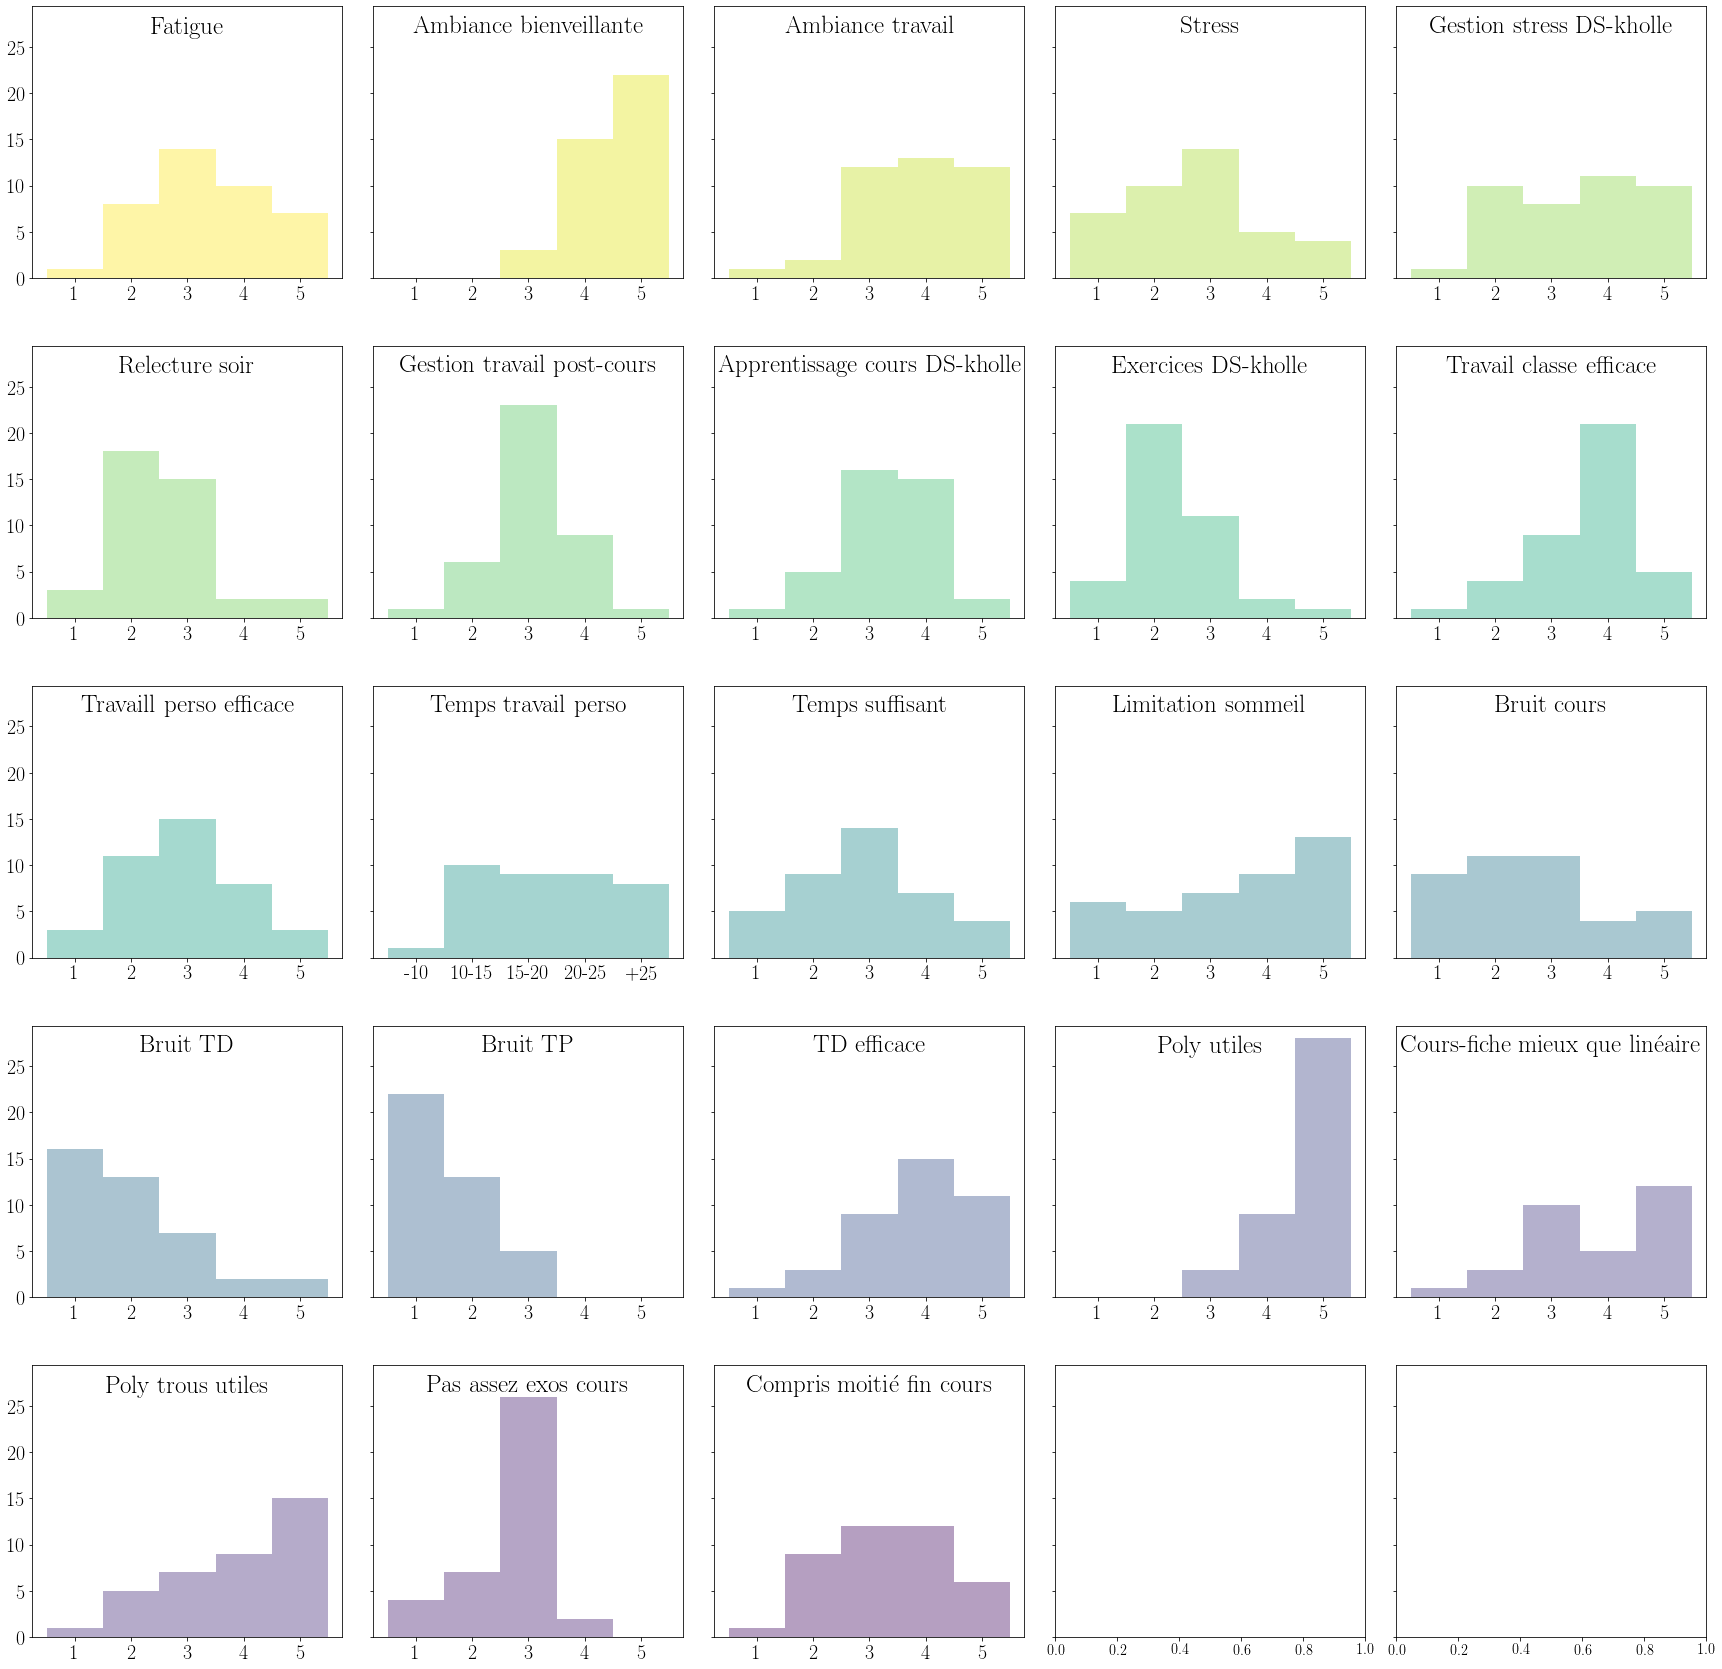

In [42]:
fig = plt.figure(figsize=[30, 30], constrained_layout=False)
gs = fig.add_gridspec(5, 5, hspace=.25, wspace=.1)
axd = gs.subplots(sharey=True)

font_dict = {'fontsize': 'x-large'}
box_prop = dict(facecolor='none', boxstyle='round', pad=0.4, alpha=0.5)

cmap = plt.cm.get_cmap('viridis')
for i, question, ax in zip(range(len(df)), df.keys(), axd.ravel()):
    histprop = {'density': False, 'bins': np.arange(1,7)-0.5,
                'color': cmap(1-i/23)}
    ax.hist(df[question], **histprop,
            alpha=.4,
            histtype='stepfilled')
    
    if 'Temps travail perso' in question:
        ax.set_xticks([1, 2, 3, 4, 5], ['-10', '10-15', '15-20', '20-25', '+25'])
    else:
        ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_title(question, fontsize=25, y=0.88)
    ax.tick_params(labelsize=20)
    # ax.set_xticks(np.arange(1, 6, step=1.0))
# for ax in axd.ravel():
#     ax.set_ylim(top=0.65)
fig.savefig(f'sondage.pdf', bbox_inches='tight')

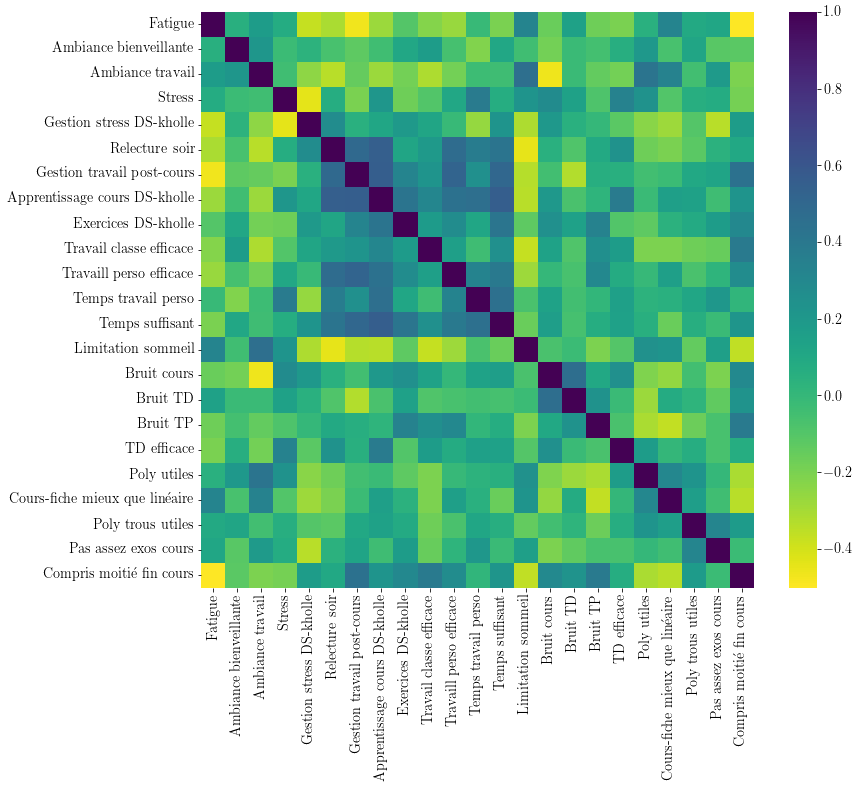

In [56]:
fig = plt.figure(figsize=[12, 10], constrained_layout=False)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sn.heatmap(corr, ax=ax, cmap='viridis_r')
fig.savefig(f'sondage_corr.pdf', bbox_inches='tight')

In [57]:
notes = pd.read_csv('../../Notes/notes.csv')

In [59]:
notes.to_latex('../../Notes/notes.tex')